In [8]:
import itertools
import pandas as pd

class Game:
    def __init__(self, teams):
        self.teams = teams
        self.num_teams = len(teams)
        self.win_rates = {team: 0 for team in teams}
        self.num_wins = {team: 0 for team in teams}
        self.total_games = {team: 0 for team in teams}
        self.matrix = []
        
    def simulate_game(self, team1, team2):
        # Simplified simulation logic; you can implement a more complex logic here
        if team1 < team2:
            winner = team1
        else:
            winner = team2
            
        # Update win counts and total games played for each team
        self.num_wins[winner] += 1
        self.total_games[team1] += 1
        self.total_games[team2] += 1
        
        # Update win rates
        self.win_rates[team1] = self.num_wins[team1] / self.total_games[team1]
        self.win_rates[team2] = self.num_wins[team2] / self.total_games[team2]
        
        # Make prediction based on win rates
        predicted_winner = team1 if self.win_rates[team1] > self.win_rates[team2] else team2
        
        # Add data to matrix, now taking into account variable number of teams
        row = [f"{team1} vs {team2}", winner]
        row.extend([self.win_rates[team] for team in self.teams])
        row.append(predicted_winner)
        
        self.matrix.append(row)
        
    def simulate_season(self):
        for team1, team2 in itertools.combinations(self.teams, 2):
            self.simulate_game(team1, team2)
            
    def calculate_upset_rate(self):
        num_upsets = 0
        total_games = len(self.matrix)
        
        for row in self.matrix:
            if row[1] != row[-1]:  # Actual winner != Predicted winner
                num_upsets += 1
                
        return num_upsets / total_games
   
    def simulate_game_with_outcome(self, team1, team2, outcome):
        winner = team1 if outcome == 0 else team2
        
        # Update win counts and total games played for each team
        self.num_wins[winner] += 1
        self.total_games[team1] += 1
        self.total_games[team2] += 1
        
        # Update win rates
        self.win_rates[team1] = self.num_wins[team1] / self.total_games[team1]
        self.win_rates[team2] = self.num_wins[team2] / self.total_games[team2]
        
        # Make prediction based on win rates
        predicted_winner = team1 if self.win_rates[team1] > self.win_rates[team2] else team2
        
        # Add data to matrix
        row = [f"{team1} vs {team2}", winner]
        row.extend([self.win_rates[team] for team in self.teams])
        row.append(predicted_winner)
        
        self.matrix.append(row)
        
    def simulate_season_with_outcome(self, outcome_bits):
        i = 0
        for team1, team2 in itertools.combinations(self.teams, 2):
            self.simulate_game_with_outcome(team1, team2, outcome_bits[i])
            i += 1







# Initialize the Game class
teams = ['A', 'B', 'C', 'D', 'E', 'F']
game = Game(teams)

# Number of games for a season
num_games = len(list(itertools.combinations(teams, 2)))

# Generate all possible outcomes (0 or 1 for each game)
all_possible_outcomes = itertools.product([0, 1], repeat=num_games)

# For storing the upset rate of each possible outcome
upset_rates = []

# Iterate through all possible outcomes
for outcome_bits in all_possible_outcomes:
    # Resetting the game statistics for new simulation
    game.win_rates = {team: 0 for team in teams}
    game.num_wins = {team: 0 for team in teams}
    game.total_games = {team: 0 for team in teams}
    game.matrix = []
    
    # Simulate the season with the current outcome
    game.simulate_season_with_outcome(outcome_bits)
    
    # Calculate the upset rate for this outcome
    upset_rate = game.calculate_upset_rate()
    upset_rates.append(upset_rate)

# Show the calculated upset rates
print(upset_rates)

[0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13333333333333333, 0.06666666666666667, 0.13333333333333333, 0.06666666666666667, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.0, 0.06666666666666667, 0.0, 0.0, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.13333333333333333, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.06666666666666667, 0.06666666666666667, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13333333333333333, 0.06666666666666667, 0.13333333333333333, 0.06666666666666667, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.06666666666666667, 0.2, 0.13333333333333333, 0.13333333333333333, 

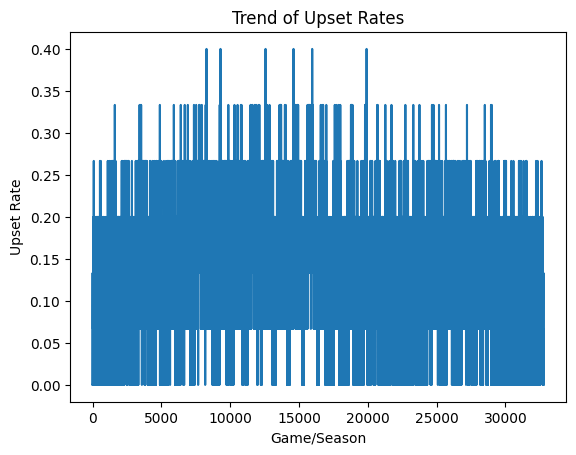

In [9]:
import matplotlib.pyplot as plt

# Assuming upset_rates is sorted or represents some sequential data
# upset_rates = [...]

plt.plot(upset_rates)
plt.title('Trend of Upset Rates')
plt.xlabel('Game/Season')
plt.ylabel('Upset Rate')
plt.show()



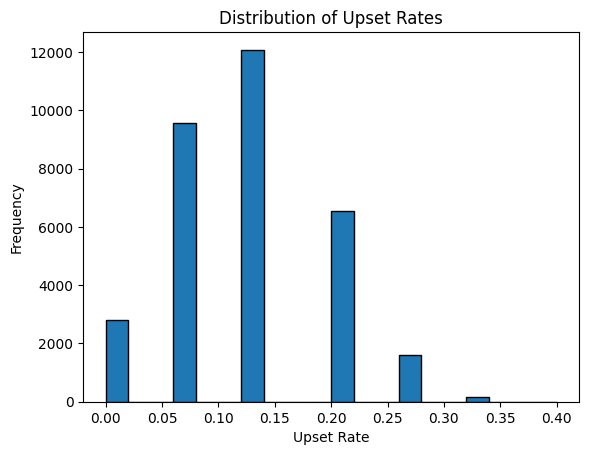

In [10]:

plt.hist(upset_rates, bins=20, edgecolor='black')
plt.title('Distribution of Upset Rates')
plt.xlabel('Upset Rate')
plt.ylabel('Frequency')
plt.show()

In [17]:
!pip install matplotlib seaborn


                                              0.0/293.3 kB ? eta -:--:--
     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


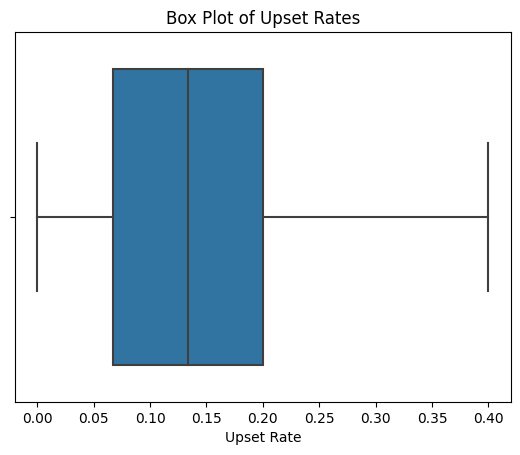

In [18]:

import seaborn as sns

# upset_rates = [...]

sns.boxplot(x=upset_rates)
plt.title('Box Plot of Upset Rates')
plt.xlabel('Upset Rate')
plt.show()
